## Module 5.3: Supervised Learning – Classification Algorithms

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Load the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Create DataFrame and Target Series
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name="target") # target: 0 = malignant, 1 = benign

# --- Initial Data Prep ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# We will use a pipeline for preprocessing for all models that need it
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Import common metrics (we will explore these more in the next module)
from sklearn.metrics import accuracy_score, classification_report

# Helper dictionary to store results
results = {}

print("Setup Complete. Data is loaded and split.")
print(f"Target classes: {cancer.target_names}")
display(X_train.head())

Setup Complete. Data is loaded and split.
Target classes: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994


## 📌 Topic 1: Logistic Regression

Despite its name, **Logistic Regression** is a **classification algorithm**. It models the **probability** that a given input point belongs to a certain class.

---

### 🔑 A. Key Concepts

#### 1. 📈 Sigmoid Function
- The **core** of Logistic Regression.
- Transforms any real-valued number into a value between **0 and 1**.
- Output can be interpreted as a **probability**.
- Formula:  
  \[
  \sigma(z) = \frac{1}{1 + e^{-z}}
  \]

---

#### 2. 🚧 Decision Boundary
- The model learns a **boundary** (line, plane, or hyperplane) to **separate the classes**.
- If a data point's predicted probability > 0.5 → **Class 1**; else → **Class 0**.

---

#### 3. ⚖️ Log-Loss (Binary Cross-Entropy)
- The **cost function** Logistic Regression minimizes.
- Penalizes the model for being **confident and wrong**.
- Formula:  
  \[
  \text{LogLoss} = -\left[ y \log(p) + (1 - y) \log(1 - p) \right]
  \]

---

#### 4. 📊 Interpreting Coefficients (Log-Odds)
- The coefficients (**`model.coef_`**) represent the **change in log-odds** for a 1-unit increase in a feature.
- **Positive coefficient** → increases the **log-odds** (and probability) of being **Class 1**.
- **Negative coefficient** → decreases the log-odds.

---

> ✅ Logistic Regression is simple, interpretable, and effective for linearly separable problems.


In [5]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression is sensitive to feature scaling, so we use a pipeline.
log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42))
])

# Fit the pipeline
log_reg_pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = log_reg_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['Logistic Regression'] = accuracy
print("--- Logistic Regression ---")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

--- Logistic Regression ---
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## 📌 Topic 2: K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a **simple**, **intuitive**, and **instance-based** learning algorithm. Unlike other models, KNN doesn’t build an explicit model — it memorizes the training data and makes predictions based on proximity.

---

### 🔑 A. Key Concepts

#### 1. 🧠 How It Works
- For a new data point, KNN:
  1. Identifies the **'K' nearest neighbors** from the training data.
  2. Takes a **majority vote** for classification (or average for regression).
- The prediction is based entirely on the labels of these nearby points.

---

#### 2. 📏 Distance Metrics
- KNN uses distance to measure **closeness** between points.
- Most common: **Euclidean Distance**.
- Other options:
  - **Manhattan Distance**
  - **Minkowski Distance**
  - **Cosine Similarity** (in some contexts)

---

#### 3. ⚠️ Curse of Dimensionality
- In **high-dimensional spaces**, distance becomes less meaningful.
- All points tend to look equally far apart → **reduced model effectiveness**.
- KNN performs best with a **limited number of relevant features**.

---

#### 4. ⚖️ Importance of Feature Scaling
- KNN is **sensitive to scale** since it relies on distance.
- Features like **salary (e.g., 0–100,000)** will dominate features like **age (e.g., 0–100)**.
- Use scaling techniques:
  - **StandardScaler** (mean = 0, std = 1)
  - **MinMaxScaler** (scales to [0,1])

---

> ✅ KNN is great for small datasets and interpretable tasks, but it becomes inefficient on large datasets and sensitive to irrelevant features without preprocessing.


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5)) # K=5 is a common starting point
])

knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['KNN (K=5)'] = accuracy
print("\n--- K-Nearest Neighbors ---")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


--- K-Nearest Neighbors ---
Accuracy: 0.9561
Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## 📌 Topic 3: Support Vector Machines (SVMs)

**Support Vector Machines (SVMs)** are **powerful and versatile** classification models. Their core idea is to find the **optimal hyperplane** that best separates the classes in the feature space.

---

### 🔑 A. Key Concepts

#### 1. 📏 Maximal Margin Classifier
- SVM seeks the **hyperplane** with the **maximum margin** — the widest possible separation between the classes.
- This margin helps generalize better on unseen data by avoiding overly tight decision boundaries.

---

#### 2. 🎯 Support Vectors
- **Support Vectors** are the **data points closest to the decision boundary**.
- They are **critical** — moving them **will shift the hyperplane**.
- The model is entirely defined by these points, not the rest of the data.

---

### ✨ The Kernel Trick ("Amaze Factor")

#### ❓ What if data isn't linearly separable?
- A straight line (or hyperplane) won't work in complex datasets.

#### 💡 The Solution: **The Kernel Trick**
- Instead of manually projecting data into higher dimensions (which is computationally expensive), SVM uses **kernels**.
- Kernels implicitly map data to higher-dimensional spaces, where a linear separation **is possible**.

---

#### ⚙️ Common Kernels

| Kernel     | Use Case                                          |
|------------|---------------------------------------------------|
| `'linear'` | For **linearly separable** datasets.              |
| `'poly'`   | **Polynomial kernel** for capturing curved trends.|
| `'rbf'`    | **Radial Basis Function** — default, **very powerful**. Can capture highly **non-linear boundaries**. |

---

> ✅ SVMs are especially effective in high-dimensional spaces and are memory-efficient because they only depend on support vectors.

### 🧠 Interpreting SVM Kernel Choices

Understanding how different kernels perform helps in selecting the right SVM configuration for your dataset.

---

### 1. 📈 Linear Kernel
- **Assumes data is linearly separable**.
- **Fast and efficient**, especially for:
  - **High-dimensional data** (e.g., text classification).
  - Cases where **features > samples**.
- ✅ In our case: The **linear kernel performed very well**, suggesting the **breast cancer dataset** is **largely linearly separable**.

---

### 2. 📉 Polynomial Kernel
- Suitable for **curved, complex boundaries**.
- Controlled by the **degree** parameter → higher degrees = more complex boundaries.
- ⚠️ In our case: **Performed worse**.
  - **Overfit** the data by creating a boundary that was **too complex**.
  - Indicates the data did **not require** this level of flexibility.

---

### 3. 🌐 RBF Kernel (Radial Basis Function)
- The **default and most flexible** kernel.
- Models **non-linear relationships** effectively.
- ✅ In our case: **Performed the best**.
  - Found a **slightly better non-linear boundary** than linear kernel.
  - Avoided the **overfitting** seen with the polynomial kernel.
- 🔑 **Best starting point** for most real-world problems.

---

> 📌 **Tip**: Try `rbf` first. Use `linear` when interpretability or speed matters. Use `poly` only when you suspect complex curvature and can regularize properly.

In [12]:
from sklearn.svm import SVC # Support Vector Classifier

# SVMs are very sensitive to feature scaling
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, random_state=42)) # C is a regularization parameter
])

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['SVM (RBF Kernel)'] = accuracy
print("\n--- Support Vector Machine ---")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


--- Support Vector Machine ---
Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [13]:
# --- Comparing SVM Kernels ---
# We'll create a pipeline for each kernel to see how they perform.
# We already have the 'rbf' pipeline, let's create ones for 'linear' and 'poly'.

print("\n--- Comparing SVM Kernel Performance ---")

# 1. Linear Kernel
svm_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_linear', SVC(kernel='linear', random_state=42))
])
svm_linear_pipeline.fit(X_train, y_train)
y_pred_linear = svm_linear_pipeline.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
results['SVM (Linear Kernel)'] = accuracy_linear
print(f"Accuracy with Linear Kernel: {accuracy_linear:.4f}")

# 2. Polynomial Kernel
# The 'degree' is a key hyperparameter for the polynomial kernel. Default is 3.
svm_poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_poly', SVC(kernel='poly', degree=3, random_state=42))
])
svm_poly_pipeline.fit(X_train, y_train)
y_pred_poly = svm_poly_pipeline.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
results['SVM (Poly Kernel)'] = accuracy_poly
print(f"Accuracy with Polynomial Kernel (degree=3): {accuracy_poly:.4f}")

# 3. RBF Kernel (already done, just re-stating for comparison)
print(f"Accuracy with RBF Kernel: {results['SVM (RBF Kernel)']:.4f}")


--- Comparing SVM Kernel Performance ---
Accuracy with Linear Kernel: 0.9737
Accuracy with Polynomial Kernel (degree=3): 0.9123
Accuracy with RBF Kernel: 0.9825


## 🌳 Topic 4: Decision Tree Classifiers

**Decision Tree Classifiers** work similarly to Decision Tree Regressors, but are used for **classification tasks** instead of predicting continuous values.

---

### 🔑 A. Key Concepts

#### 1. 🔍 How It Works
- The tree **partitions the data** by asking a series of **if/else questions** based on feature values.
- Each split aims to create the most **homogeneous subsets** (pure class distributions) possible.
- The process continues **recursively** until a stopping condition is met (e.g., max depth, minimum samples per leaf, or full purity).

---

#### 2. 🌱 Impurity Measures
- At each node, the algorithm chooses the **best feature and threshold** to split the data.
- The goal: **maximize the purity** of the child nodes (i.e., minimize impurity).

---

#### 3. 📉 Gini Impurity
- Measures the **likelihood of incorrect classification** of a randomly chosen item.
- A **Gini score of 0** → the node is **perfectly pure** (only one class present).
- Formula:
  \[
  \text{Gini} = 1 - \sum_{i=1}^{n} (p_i)^2
  \]
  where \( p_i \) is the probability of class \( i \) at the node.

---

#### 4. 🔥 Entropy
- Measures the **amount of disorder or impurity**.
- Like Gini, **entropy = 0** means perfect purity.
- Formula:
  \[
  \text{Entropy} = - \sum_{i=1}^{n} p_i \log_2(p_i)
  \]
- It’s derived from **information theory** and represents how much information is needed to describe the class distribution.

---

> ✅ Both **Gini Impurity** and **Entropy** work similarly in practice. Gini is slightly faster, while Entropy can offer better performance in some cases depending on the data.


In [14]:
from sklearn.tree import DecisionTreeClassifier

# Decision Trees do not require feature scaling
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['Decision Tree'] = accuracy
print("\n--- Decision Tree Classifier ---")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))
# Note: A single decision tree is often prone to overfitting.


--- Decision Tree Classifier ---
Accuracy: 0.9123
Classification Report:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



## 📌 Topic 5: Naive Bayes Classifiers

**Naive Bayes** is a **simple yet powerful** probabilistic classifier that applies **Bayes' Theorem** with a strong (naive) assumption of feature independence. It’s especially effective for **text classification** tasks like spam filtering.

---

### 🔑 A. Key Concepts

#### 1. 📚 Bayes' Theorem
- Computes the **posterior probability** of a class given the input features:
  \[
  P(\text{Class} | \text{Features}) = \frac{P(\text{Features} | \text{Class}) \cdot P(\text{Class})}{P(\text{Features})}
  \]
- Combines:
  - **Likelihood**: \( P(\text{Features} | \text{Class}) \)
  - **Prior**: \( P(\text{Class}) \)
  - **Evidence**: \( P(\text{Features}) \)

---

#### 2. 🧠 The "Naive" Assumption ("Amaze Factor")
- Assumes all features are **conditionally independent** given the class.
- In practice, this assumption is **rarely true**, but the algorithm still performs **surprisingly well**.

#### 🔍 Example:
- In a **spam filter**, Naive Bayes assumes:
  - The probability of the word **"viagra"** appearing is **independent** of the word **"sale"**, **given** the email is spam.
- Despite the unrealistic assumption, it works effectively in domains like **text classification**.

---

### 🧪 Types of Naive Bayes Classifiers

| Type            | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| **GaussianNB**  | Assumes features follow a **normal distribution**.<br> Best for **continuous** numeric data. |
| **MultinomialNB** | Designed for **discrete counts**, like **word frequencies** in text documents. Ideal for **text classification**. |

---

> ✅ Naive Bayes is extremely **fast**, requires **very little training data**, and often serves as a strong **baseline model**, especially in **NLP tasks**.


In [15]:
from sklearn.naive_bayes import GaussianNB

# We'll use a pipeline to scale data, which can sometimes help GaussianNB
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['Gaussian Naive Bayes'] = accuracy
print("\n--- Gaussian Naive Bayes ---")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


--- Gaussian Naive Bayes ---
Accuracy: 0.9298
Classification Report:
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



## 🤖 Topic 6: Ensemble Methods for Classification

**Ensemble Methods** combine the predictions of multiple models to produce **better and more robust** results. Just like in regression, they help **reduce overfitting**, **increase accuracy**, and **improve generalization**.

---

### 🅰️ Random Forest Classifier

#### 🌲 How It Works:
- Builds **many Decision Trees**, each trained on a **random subset** of the data and features (bagging).
- Final prediction is based on a **majority vote** from all trees.
- Helps to **reduce overfitting** and improves stability compared to a single decision tree.

> ✅ Great default classifier; works well with little tuning.

---

### 🅱️ Gradient Boosting Classifiers  
(Examples: **XGBoost**, **LightGBM**, **CatBoost**)

#### 🚀 How It Works:
- Builds trees **sequentially**.
- Each new tree tries to **correct the errors** made by the previous trees.
- This leads to a **strong predictive model** from weak learners.
- Often **outperforms** other models in structured data tasks.

> ⚠️ Powerful but can overfit if not tuned carefully.

---

### 🆎 Voting Classifier

#### 🗳️ How It Works:
- Combines **multiple different models** (e.g., Logistic Regression, KNN, SVM).
- Makes predictions based on a **majority vote** (for classification).
- Can use:
  - **Hard voting** (majority class)
  - **Soft voting** (averaged probabilities)

> ✅ Simple yet effective — useful when you have multiple models that perform well individually.

---

> 📌 Ensemble methods harness the strengths of multiple models, improving overall prediction accuracy and robustness.


In [16]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# --- Random Forest ---
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['Random Forest'] = accuracy
print("\n--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy:.4f}")

# --- XGBoost ---
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['XGBoost'] = accuracy
print("\n--- XGBoost Classifier ---")
print(f"Accuracy: {accuracy:.4f}")

# --- CatBoost Classifier ---
# As before, CatBoost can handle raw data, but for this comparison,
# we'll fit it on the non-scaled data just like the other tree-based models.
cat_clf = cb.CatBoostClassifier(random_state=42, verbose=0)
cat_clf.fit(X_train, y_train)
y_pred = cat_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['CatBoost'] = accuracy
print("\n--- CatBoost Classifier ---")
print(f"Accuracy: {accuracy:.4f}")

# --- Voting Classifier ---
# Let's combine three of our best models: Logistic Regression, SVM, and Random Forest
# We use the pipeline for LogReg and the trained RF classifier
clf1 = log_reg_pipeline
clf2 = svm_pipeline
clf3 = rf_clf
# 'hard' voting uses majority vote. 'soft' voting averages probabilities.
voting_clf = VotingClassifier(estimators=[('lr', clf1), ('svm', clf2), ('rf', clf3)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results['Voting Classifier'] = accuracy
print("\n--- Voting Classifier ---")
print(f"Accuracy: {accuracy:.4f}")


--- Random Forest Classifier ---
Accuracy: 0.9561


F:\Python for Data science\python_ds_mastery_journey\module_0_setup\venv_ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:44:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Classifier ---
Accuracy: 0.9561

--- CatBoost Classifier ---
Accuracy: 0.9561

--- Voting Classifier ---
Accuracy: 0.9825


In [22]:
results_df= pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
display(results_df)

,Model,Accuracy
0,Logistic Regression,0.982456
2,SVM (RBF Kernel),0.982456
10,Voting Classifier,0.982456
3,SVM (Linear Kernel),0.973684
1,KNN (K=5),0.956140
7,Random Forest,0.956140
8,XGBoost,0.956140
9,CatBoost,0.956140
6,Gaussian Naive Bayes,0.929825
5,Decision Tree,0.912281


## Mini-Project: Customer Churn Prediction

In [23]:
# This code block will download the dataset and create the CSV file.
# Run this cell once.

# URL to the raw CSV data from a reliable source
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

try:
    # Read the data from the URL into a pandas DataFrame
    df_to_save = pd.read_csv(url)
    
    # Save the DataFrame to a local CSV file
    df_to_save.to_csv("telco_churn.csv", index=False)
    
    print("'telco_churn.csv' file created successfully.")
    print("You can now proceed with the mini-project.")
    
except Exception as e:
    print(f"An error occurred while trying to download the data: {e}")
    print("Please check your internet connection or use the manual copy/paste method if the issue persists.")

'telco_churn.csv' file created successfully.
You can now proceed with the mini-project.


### Goal: Apply the classification models you've learned to predict whether a customer will churn (leave the service).
- Dataset: telco_churn.csv (which you have now successfully loaded).
1. **Load and Prepare Data:**
    - Load the telco_churn.csv dataset.
    - The TotalCharges column has spaces for new customers who haven't been charged yet. Convert it to a numeric type. This will create some missing values. (Hint: `pd.to_numeric(df['TotalCharges'], errors='coerce')`).
    - Fill any missing TotalCharges values (e.g., with the median or 0).
    - The Churn column is your target y. Convert its 'Yes'/'No' values to 1s and 0s. (Hint: use `.map({'No': 0, 'Yes': 1})`).
    - Your features X will be all other columns except customerID (which is just an identifier) and Churn.
2. **Train-Test Split:** Split your X and y data into training and testing sets. Use `test_size=0.2` and `random_state=42`. Use `stratify=y` to ensure the proportion of churners is the same in both sets.
3. **Create a Preprocessing Pipeline:**
    - First, identify which of your feature columns are numerical and which are categorical.
    - Create a ColumnTransformer that applies different preprocessing steps to different types of columns.
        - **For numerical features:** Use a Pipeline that first fills any remaining missing values (SimpleImputer(strategy='median')) and then scales the data (StandardScaler).
        - **For categorical features:** Use a Pipeline that first fills any remaining missing values (SimpleImputer(`strategy='most_frequent'`)) and then one-hot encodes the data (OneHotEncoder(`handle_unknown='ignore'`)).
4. **Apply and Compare Models:**
    - Create full, end-to-end Pipeline objects for at least four different classifiers (e.g., Logistic Regression, SVM, Random Forest, XGBoost, CatBoost). Each pipeline will have your ColumnTransformer from step 3 as its first step and the classifier as its second step.
    - Fit each of these full pipelines on the raw X_train and y_train data.
    - For each pipeline, make predictions on X_test and evaluate its performance. Store the results.
5. **Summarize and Interpret:**
    - Create a summary table (e.g., a Pandas DataFrame) showing the Accuracy, Precision (for class 1), and Recall (for class 1) of each model.
    - Identify the best-performing model based on your chosen metrics.
    - In a Markdown cell, answer this critical business question: For a customer churn problem, why might a company care more about maximizing Recall for the 'Yes' (churn) class than maximizing overall Accuracy? What is the business trade-off? (This is a key "amaze factor" question).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier # New import
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Set plot style
sns.set_theme(style="whitegrid")

In [2]:
# Reading the data
telco= pd.read_csv('telco_churn.csv')
# Copying the data
df=telco.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Converting TotalCharges column to numeric
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# filling missing values in TotalCharges column with median value.
median_totalcharges= df['TotalCharges'].median()
df['TotalCharges']= df['TotalCharges'].fillna(median_totalcharges,)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# Converting Churn column's 'Yes'/'No' values to 1s and 0s
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [16]:
X= df.drop(columns=['customerID', 'Churn'])
y = df['Churn']
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [17]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [18]:
# Splitting of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42, stratify=y)

print(f"X_train set: {X_train.shape}")
print(f"y_train set: {y_train.shape}")
print("-"*30)
print(f"X_test set: {X_test.shape}")
print(f"y_test set: {y_test.shape}")

X_train set: (5634, 19)
y_train set: (5634,)
------------------------------
X_test set: (1409, 19)
y_test set: (1409,)


In [32]:
# Identify numerical and categorical columns
numerical_features= X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features= X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print(f"Identified {len(numerical_features)} numerical features.")
print(f"Identified {len(categorical_features)} categorical features.")

# Create a preprocessing pipeline for numerical features
numeric_transformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler())
])
# Create a preprocessing pipeline for categorical features
categorical_transformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

# Creating a single ColumnTransformer
preprocessor = ColumnTransformer(transformers =[
    ('num', numeric_transformers, numerical_features),
    ('cat', categorical_transformers, categorical_features)
])

# Define the individual classifiers
classifiers={
    'LogisticRegression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(kernel = 'rbf', C=1.0, random_state= 42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Store the results
results ={}

# Iterate through each individual classifier
for name, clf in classifiers.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    print(f"Training {name}...")
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)

    # Storing results
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1)
    }
    print(f"{name} evaluation complete.\n")
    
# Creating Voting Classifier
print("---")
print("Training Voting Classifier...")
clf1 = LogisticRegression(random_state=42)
clf2 = SVC(kernel = 'rbf', C=1.0, random_state= 42)
clf3 = CatBoostClassifier(random_state=42, verbose=0)

voting_clf = VotingClassifier(estimators=[
    ('lr',clf1),
    ('svm', clf2),
    ('catboost', clf3)], voting='hard'
)

# Create a full pipeline for the Voting Classifier
voting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])
voting_pipeline.fit(X_train, y_train)
y_pred_voting = voting_pipeline.predict(X_test)

# Store voting results
results['Voting Classifier'] = {
    'Accuracy': accuracy_score(y_test, y_pred_voting),
    'Precision': precision_score(y_test, y_pred_voting, pos_label=1),
    'Recall': recall_score(y_test, y_pred_voting, pos_label=1)
}
print("Voting Classifier evaluation complete.\n")

# Create a pandas DataFrame from the results for a clean summary
results_df = pd.DataFrame(results).T
results_df.sort_values(by = 'Recall', ascending= False, inplace = True)
display(results_df)

Identified 4 numerical features.
Identified 15 categorical features.
Training LogisticRegression...
LogisticRegression evaluation complete.

Training Support Vector Machine...
Support Vector Machine evaluation complete.

Training Random Forest...
Random Forest evaluation complete.

Training XGBoost...


F:\Python for Data science\python_ds_mastery_journey\module_0_setup\venv_ds\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:43:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost evaluation complete.

Training CatBoost...
CatBoost evaluation complete.

---
Training Voting Classifier...
Voting Classifier evaluation complete.



,Accuracy,Precision,Recall
LogisticRegression,0.805536,0.657233,0.558824
XGBoost,0.784954,0.605970,0.542781
CatBoost,0.797019,0.642857,0.529412
Voting Classifier,0.799858,0.653333,0.524064
Support Vector Machine,0.791341,0.641844,0.483957
Random Forest,0.777857,0.603390,0.475936


C:\Users\HP\AppData\Local\Temp\ipykernel_5688\98170134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Recall'], palette='viridis')


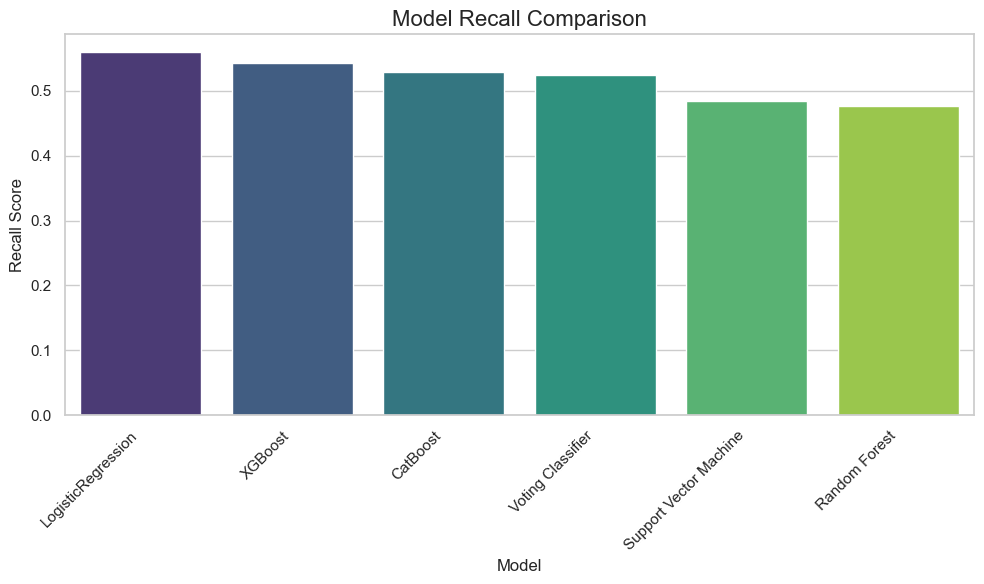

In [35]:
# Create a bar chart for Recall scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Recall'], palette='viridis')
plt.title('Model Recall Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Recall Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The best model is LogisticRegression**

**Why Recall is More Important Than Accuracy in Customer Churn Prediction**

For a customer churn problem, a company cares more about maximizing **Recall** than overall **Accuracy** because the cost of making different types of mistakes is vastly unequal.

---

**Why Accuracy Can Be Misleading**

Accuracy can be dangerously misleading.  
If only **5%** of your customers churn, a naive model that predicts **no one will churn** is **95% accurate**—but **completely useless** for business purposes.

> It fails at its one job: identifying at-risk customers.

---

**Why Recall Matters Most**

**Recall** answers the most critical business question:  
> "_Of all the customers who were actually going to leave, what percentage did we successfully flag?_"

- A **False Negative** (low Recall) is when your model predicts a customer will stay, but they actually **leave**.  
  This is the most **expensive error**. You lose revenue **forever** because you never got the chance to intervene.

- A **False Positive** is when your model predicts a customer will leave, but they were planning to stay.  
  The cost is minimal—you may waste a small retention bonus on a loyal customer.

 **Maximizing Recall** is a direct strategy to **minimize the most costly error**: False Negatives.

---

**Business Trade-Off: Recall vs. Precision**

While Recall is critical, it comes with a trade-off:

- **Precision** answers:  
  > "_Of all the customers we predicted would churn, how many were we correct about?_"

- 🔁 **The Trade-off**:  
  As you increase **Recall** to catch more potential churners, **Precision** may drop.  
  This means more **False Positives**—happy customers receiving unnecessary retention offers.

---

**Summary**

- Maximize **Recall** to reduce customer loss.
- Monitor **Precision** to balance business costs.
- Don't rely solely on **Accuracy**—it hides critical flaws in imbalance problems like churn.
